# Air quality dataset


**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,LSTM,Dropout
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("data/pollution_dataset.csv")
df.head(10)

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
5         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
6         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
7         31.0      59.6    5.0  16.8  24.2  13.6  1.38   
8         29.4      93.8   10.3  22.7  45.1  11.8  2.03   
9         33.2      80.5   11.1  24.4  32.0  15.3  1.69   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
5                            3.1                 674   Hazardous  
6                            4.6                 735        Poor  
7                            6.3                 443    Moderate  
8                            5.4                 486        Poor  
9                            4.9                 535        Poor

In [4]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

<Axes: xlabel='Air Quality'>

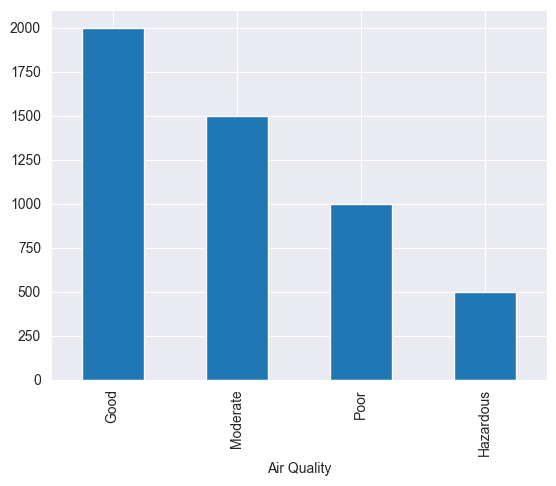

In [7]:
df['Air Quality'].value_counts().plot.bar()

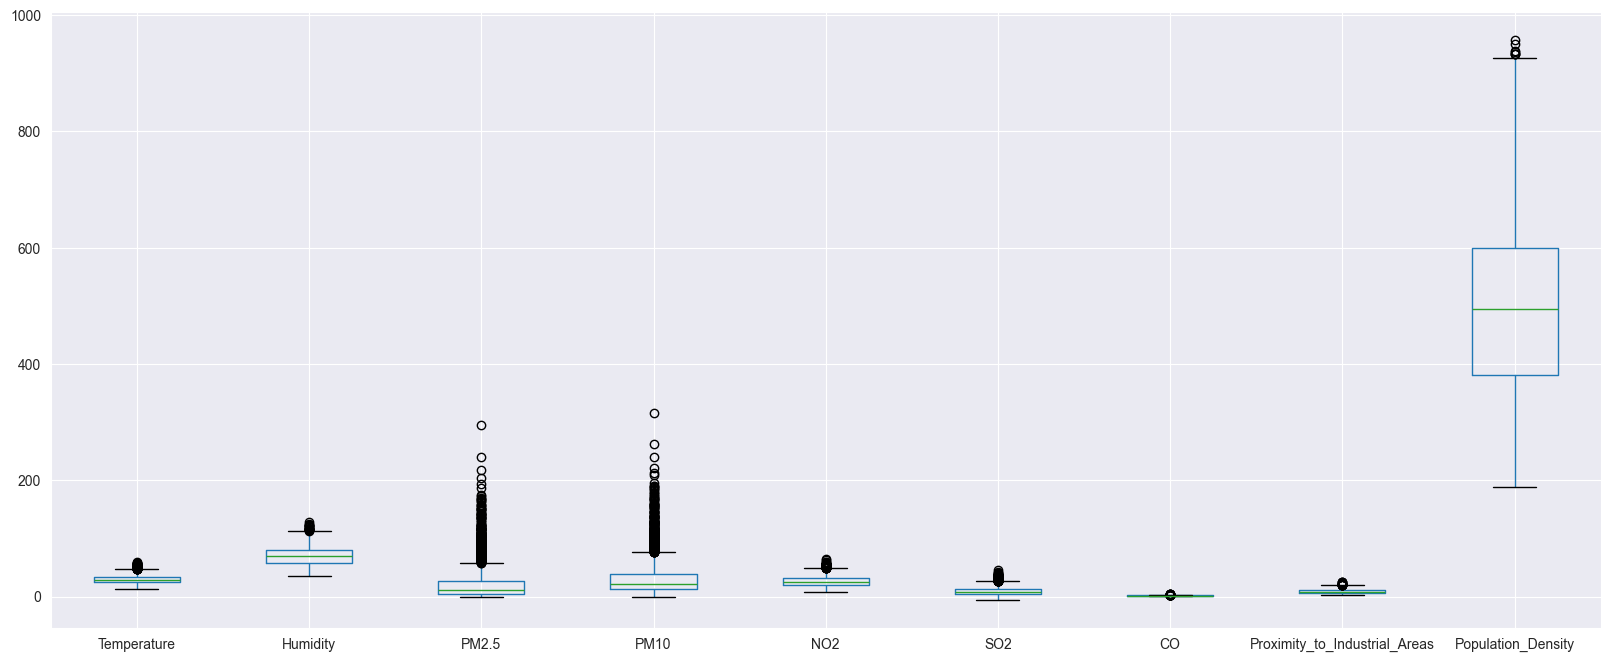

In [9]:
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

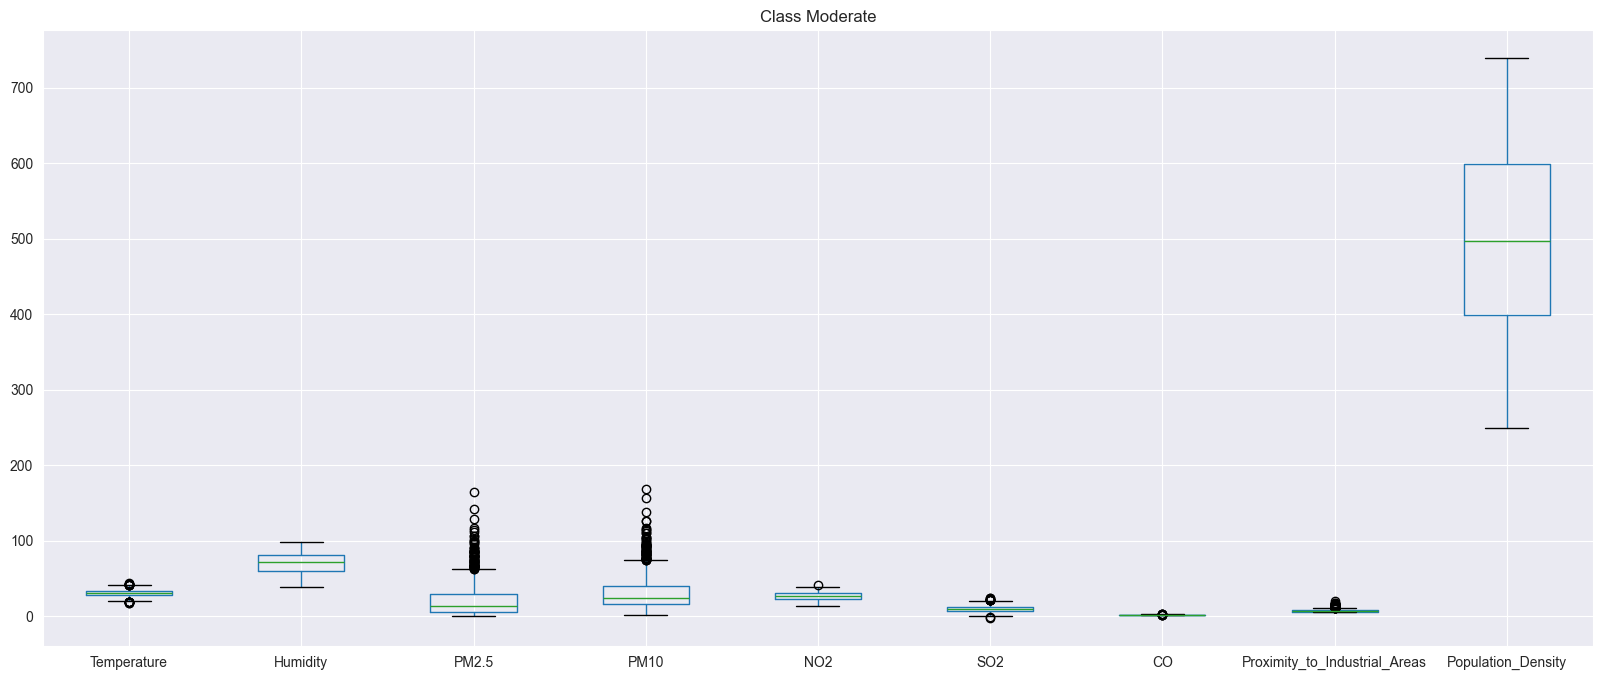

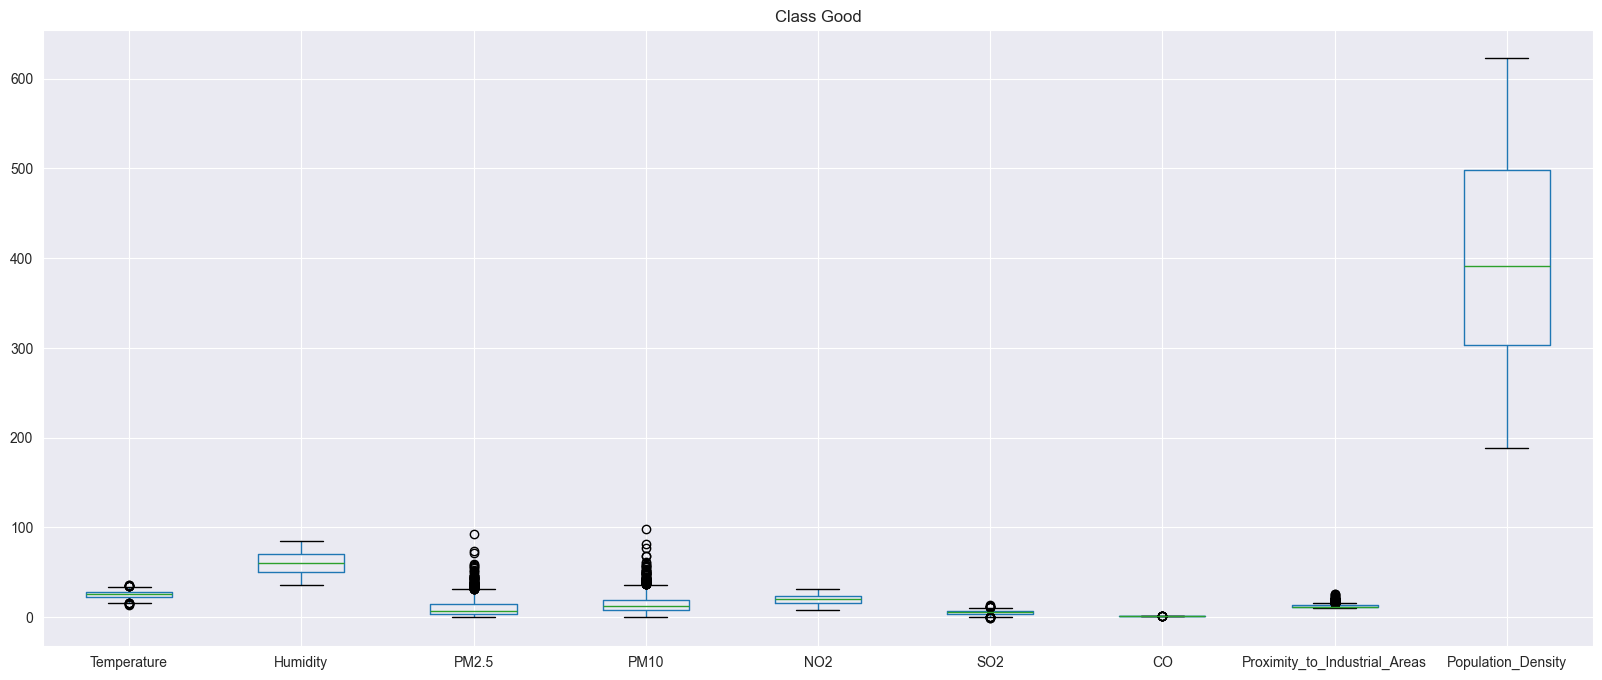

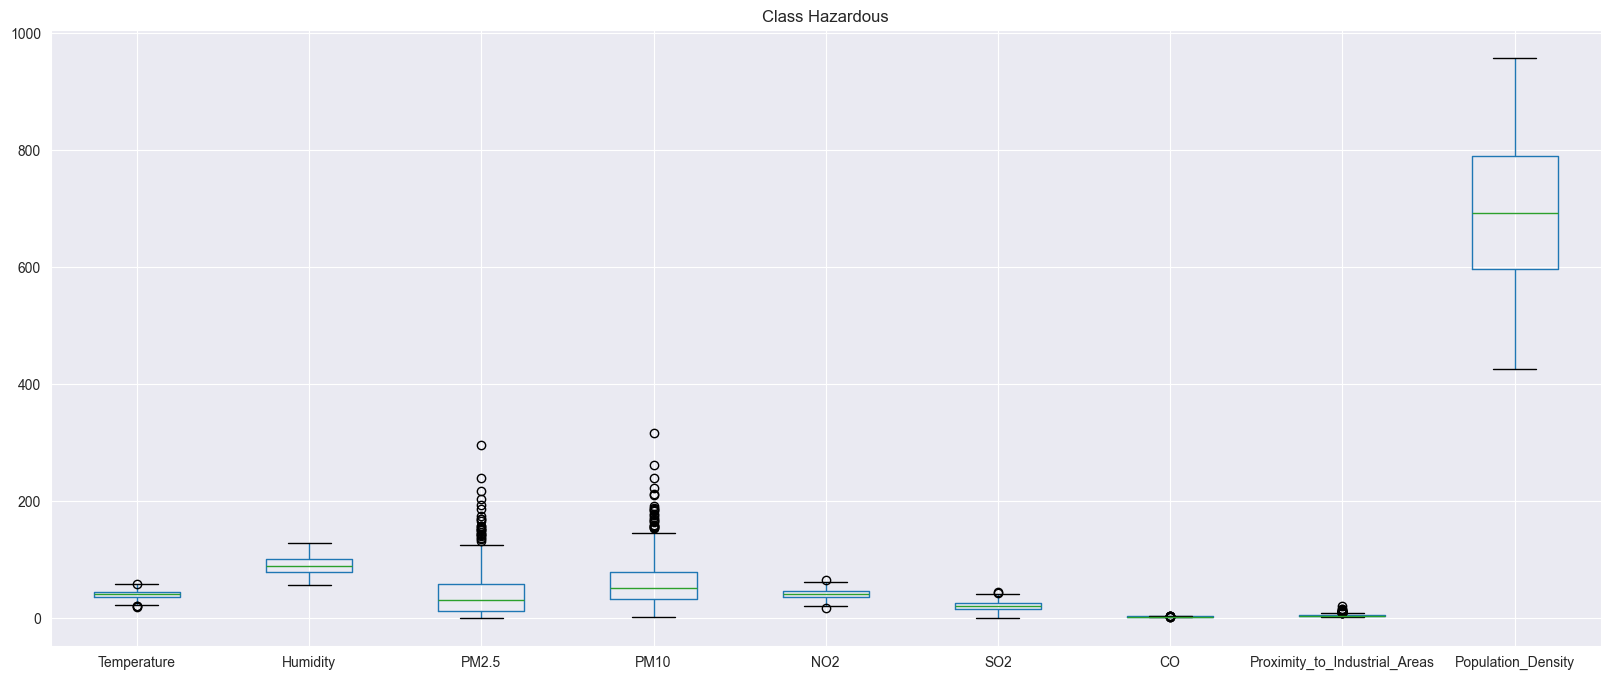

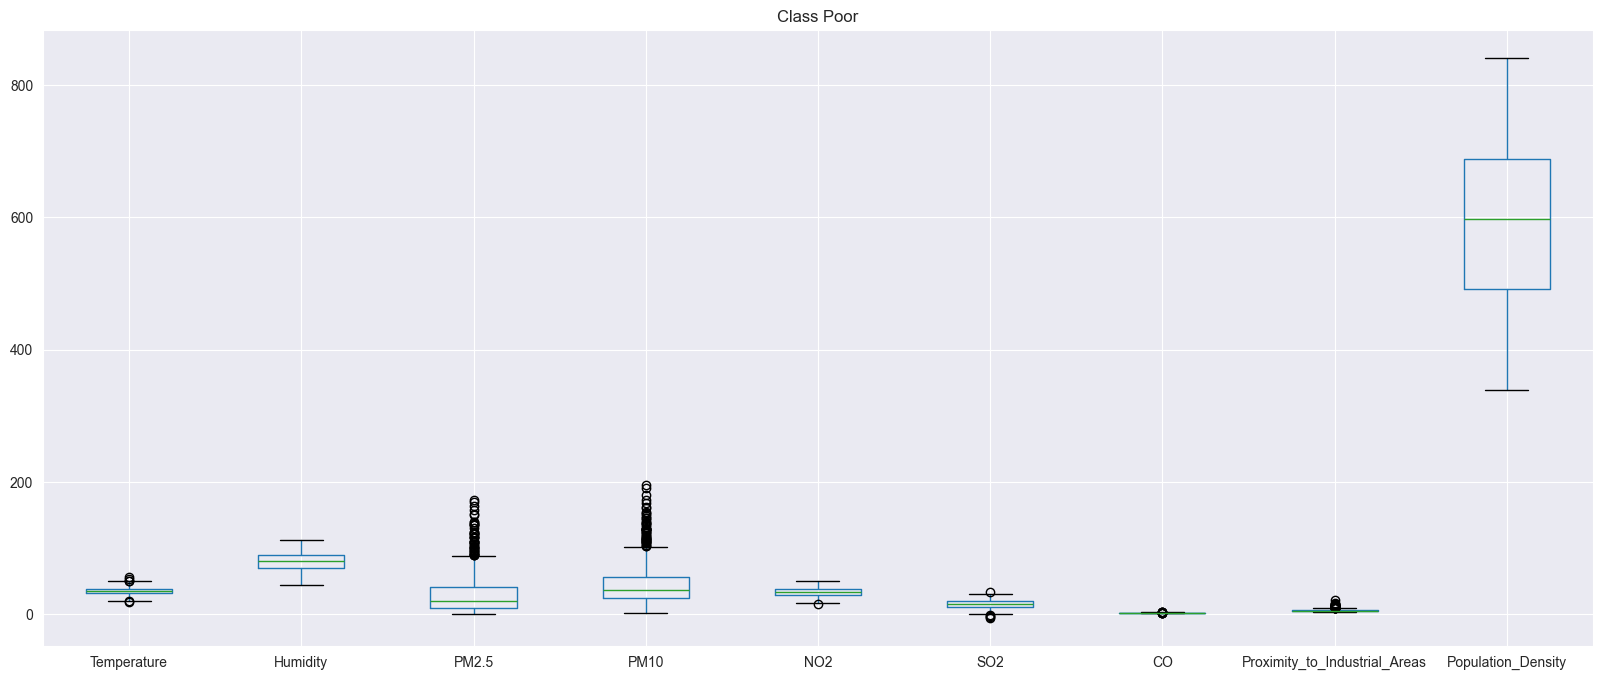

In [11]:
unique_classes = df['Air Quality'].unique()
for i in unique_classes:
    plt.figure(figsize=(20,8))
    df[df['Air Quality']==i].drop(columns='Air Quality',axis=1).boxplot()
    plt.title('Class {}'.format(i))
    plt.show()

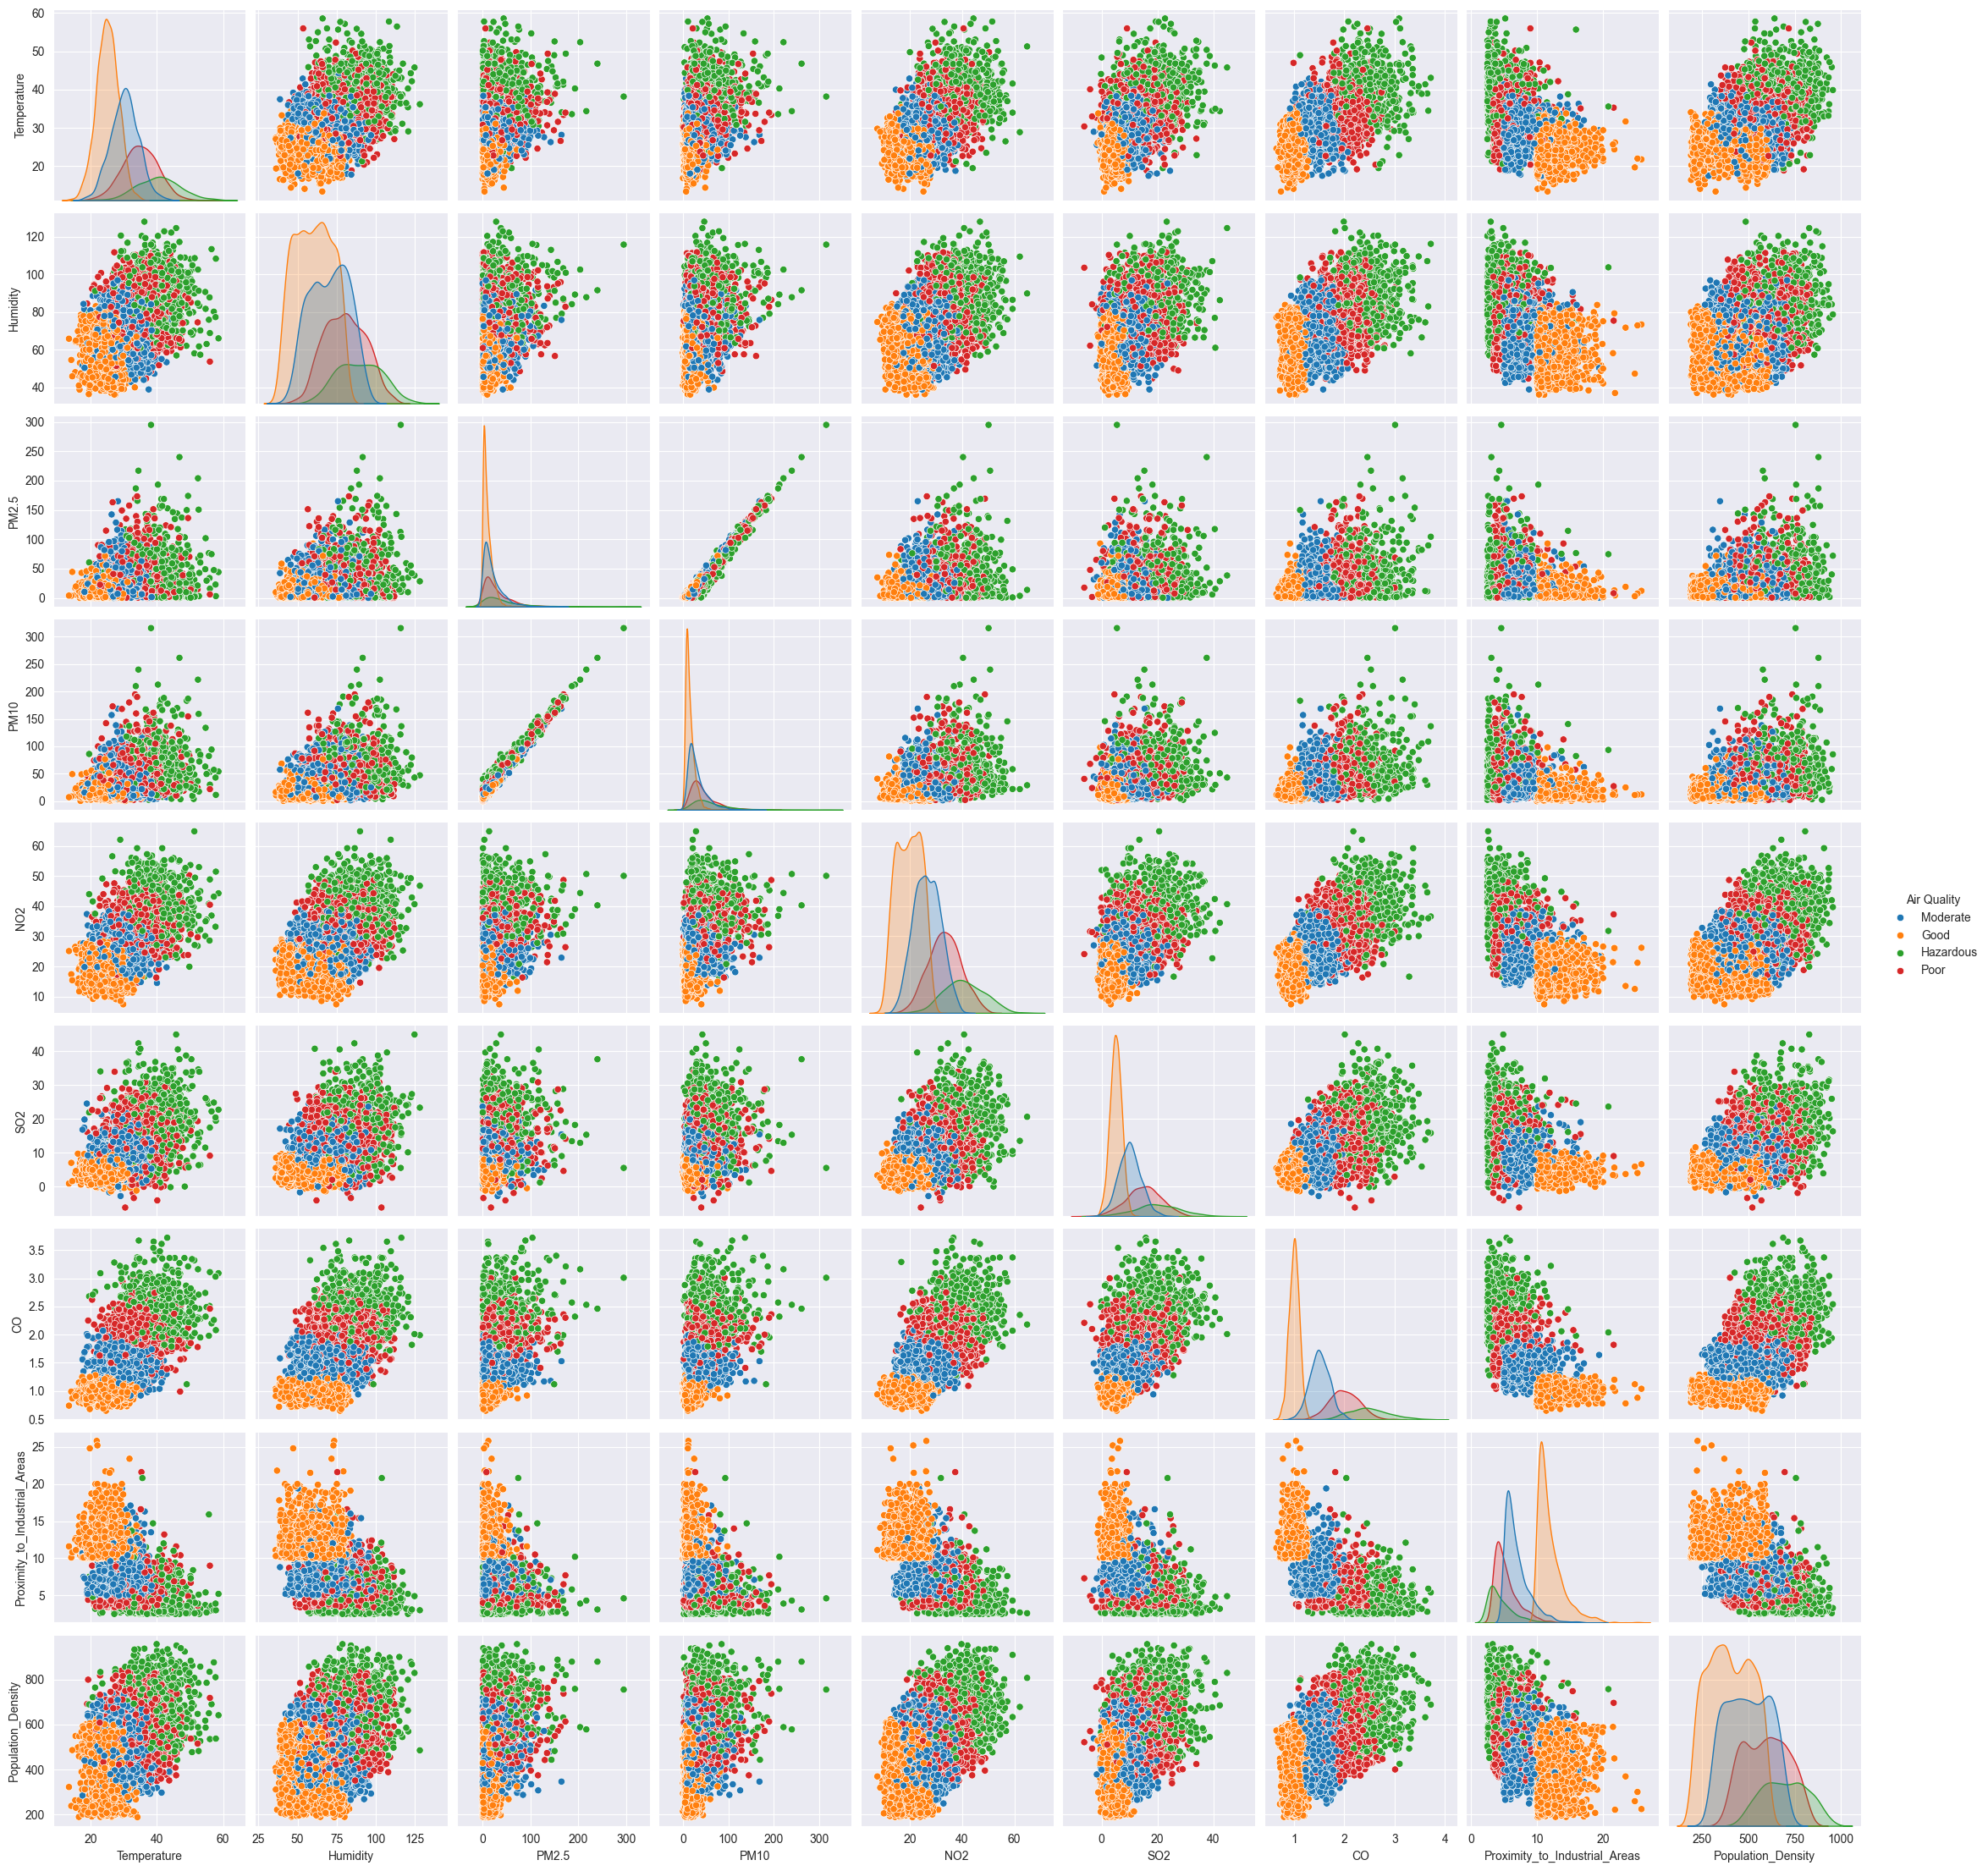

In [12]:
sns.pairplot(df,hue='Air Quality')

<Axes: >

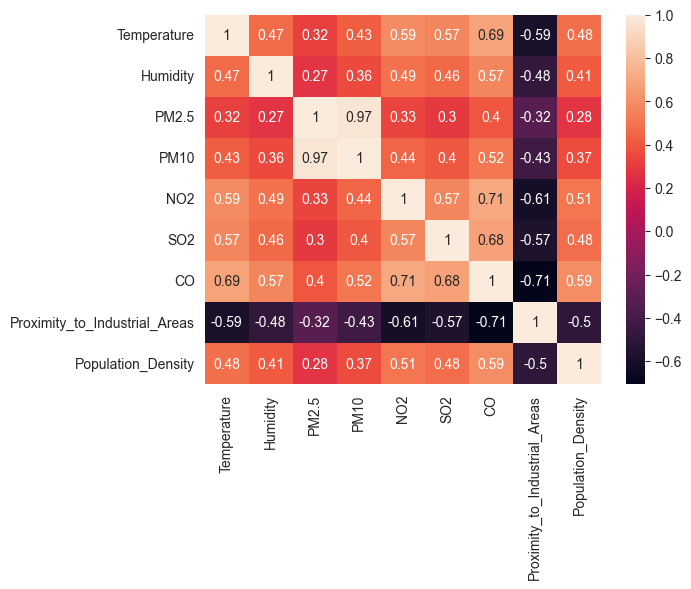

In [14]:
all_features = [col for col in df.columns if col!='Air Quality']
sns.heatmap(df[all_features].corr(),annot=True)

In [15]:
df = df.drop(columns=['CO','PM10','NO2'],axis=1)

In [16]:
X,y = df.drop(columns='Air Quality',axis=1),pd.get_dummies(df['Air Quality']).astype('int')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

In [18]:
X_train.shape

(4000, 6)

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## First model

In [21]:
model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=4, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820 (3.20 KB)

 Trainable params: 820 (3.20 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model1.fit(X_train, y_train,epochs=10, batch_size=16,validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4261 - loss: 1.3033 - val_accuracy: 0.5575 - val_loss: 0.9364
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6930 - loss: 0.8006 - val_accuracy: 0.7950 - val_loss: 0.6090
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.5512 - val_accuracy: 0.8275 - val_loss: 0.4923
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8425 - loss: 0.4557 - val_accuracy: 0.8350 - val_loss: 0.4556
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.4300 - val_accuracy: 0.8350 - val_loss: 0.4503
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.4228 - val_accuracy: 0.8225 - val_loss: 0.4410
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - loss: 0.4314 - val_accuracy: 0.8350 - val_loss: 0.4397
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3867 - val_accuracy: 0.

In [24]:
pred = model1.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [25]:
y_pred_classes = np.argmax(pred, axis=1)

<Axes: >

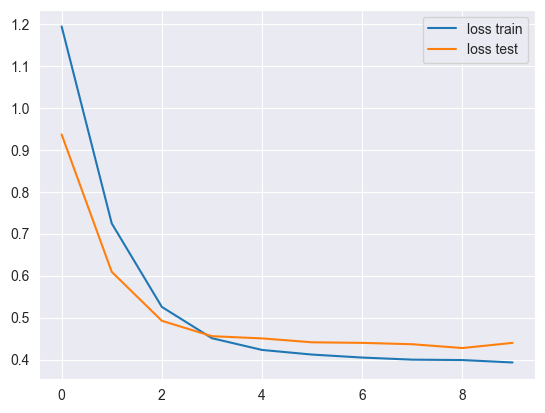

In [26]:
sns.lineplot(history.history['loss'],label='loss train')
sns.lineplot(history.history['val_loss'],label='loss test')

In [27]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes,zero_division=0))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       415
           1       0.70      0.80      0.74        84
           2       0.83      0.80      0.81       294
           3       0.73      0.70      0.71       207

    accuracy                           0.85      1000
   macro avg       0.80      0.82      0.81      1000
weighted avg       0.85      0.85      0.85      1000



<Axes: >

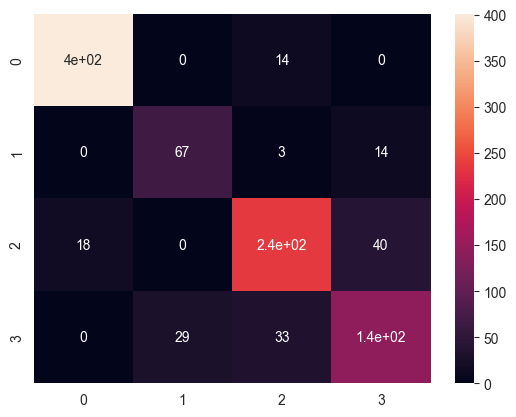

In [48]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes),annot=True)

## Second model

In [29]:
X_train_r = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_r = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
model2 = Sequential([
    Input(shape=(X_train_r.shape[1],X_train_r.shape[2])),
    LSTM(units=32,activation="relu", return_sequences=True),
    Dropout(0.2),
    LSTM(units=16,activation="relu", return_sequences=False),
    Dense(units=4, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,556 (29.52 KB)

 Trainable params: 7,556 (29.52 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_2 = model2.fit(X_train_r, y_train,epochs=10, batch_size=16,validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4088 - loss: 1.2946 - val_accuracy: 0.6525 - val_loss: 0.7372
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6582 - loss: 0.7580 - val_accuracy: 0.6700 - val_loss: 0.7233
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6691 - loss: 0.7488 - val_accuracy: 0.6325 - val_loss: 0.7576
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6555 - loss: 0.7454 - val_accuracy: 0.6600 - val_loss: 0.7180
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6680 - loss: 0.7294 - val_accuracy: 0.6550 - val_loss: 0.7059
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6647 - loss: 0.7442 - val_accuracy: 0.6700 - val_loss: 0.7162
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6645 - loss: 0.7309 - val_accuracy: 0.6450 - val_loss: 0.6971
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6771 - loss: 0.7212 - val_accuracy: 0.

In [34]:
pred_2 = model2.predict(X_test)
y_pred_classes_2 = np.argmax(pred_2, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<Axes: >

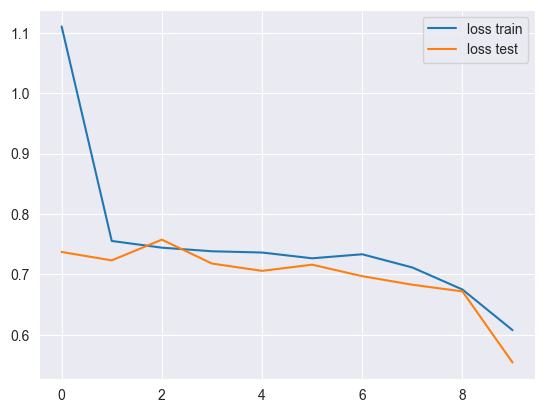

In [35]:
sns.lineplot(history_2.history['loss'],label='loss train')
sns.lineplot(history_2.history['val_loss'],label='loss test')

In [36]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes_2,zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       415
           1       0.73      0.44      0.55        84
           2       0.70      0.72      0.71       294
           3       0.63      0.59      0.61       207

    accuracy                           0.77      1000
   macro avg       0.73      0.68      0.70      1000
weighted avg       0.76      0.77      0.76      1000



<Axes: >

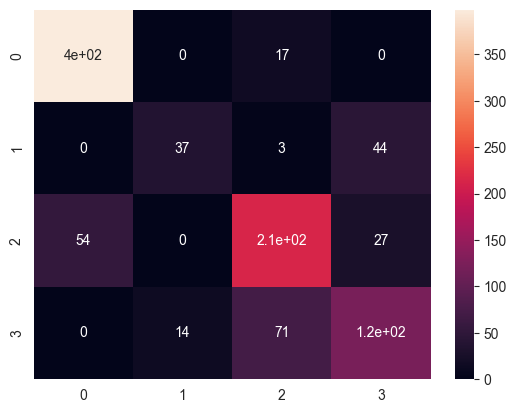

In [47]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_2),annot=True)

## Third Model

In [40]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(units=32, activation='tanh'),
    Dense(units=16, activation='relu'),
    Dropout(0.1),
    Dense(units=8, activation='relu'),
    Dense(units=4, activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924 (3.61 KB)

 Trainable params: 924 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history_3 = model3.fit(X_train, y_train,epochs=10, batch_size=16,validation_split=0.1)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5547 - loss: 1.1523 - val_accuracy: 0.7600 - val_loss: 0.6643
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7637 - loss: 0.6204 - val_accuracy: 0.7875 - val_loss: 0.5229
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7756 - loss: 0.5238 - val_accuracy: 0.7975 - val_loss: 0.4750
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4826 - val_accuracy: 0.8375 - val_loss: 0.4527
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.4621 - val_accuracy: 0.8325 - val_loss: 0.4346
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.4393 - val_accuracy: 0.8475 - val_loss: 0.4266
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8339 - loss: 0.4095 - val_accuracy: 0.8350 - val_loss: 0.4368
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8334 - loss: 0.4074 - val_accuracy: 0.

In [43]:
pred_3 = model3.predict(X_test)
y_pred_classes_3 = np.argmax(pred_3, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

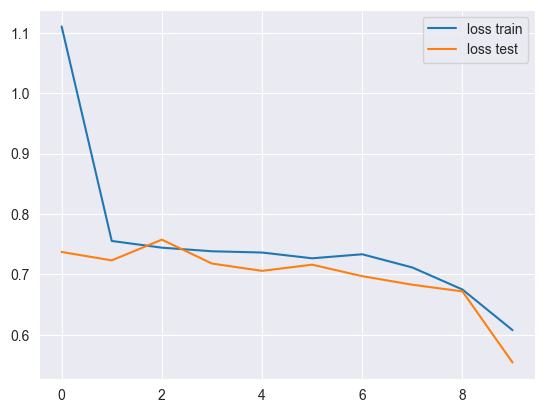

In [44]:
sns.lineplot(history_2.history['loss'],label='loss train')
sns.lineplot(history_2.history['val_loss'],label='loss test')

In [45]:
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes_3,zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       415
           1       0.65      0.83      0.73        84
           2       0.85      0.78      0.81       294
           3       0.71      0.66      0.68       207

    accuracy                           0.84      1000
   macro avg       0.79      0.81      0.80      1000
weighted avg       0.85      0.84      0.84      1000



<Axes: >

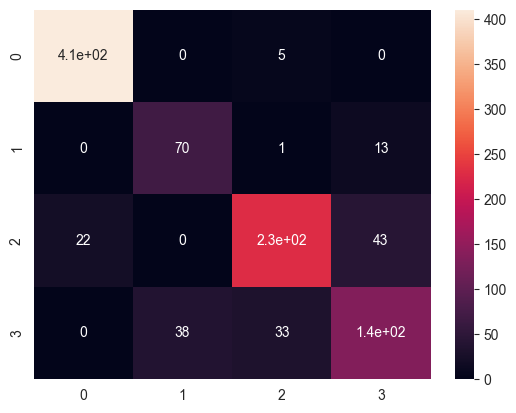

In [46]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_3),annot=True)